In [1]:
import numpy as np
import cupy as cp
import time
import matplotlib.pyplot as plt

In [2]:
def clear_mem():
    mempool = cp.get_default_memory_pool()
    mempool.free_all_blocks()

# CuPy

CuPy is an open-source GPU-accelerated array library for Python, designed to provide a highly compatible interface with NumPy. By leveraging NVIDIA's CUDA platform, CuPy enables efficient execution of numerical computations on GPUs, offering significant performance improvements over traditional CPU-based processing.

## Key Features

- **NumPy-Compatible API**: CuPy's API closely mirrors that of NumPy, facilitating a smooth transition for users familiar with NumPy to harness GPU acceleration without extensive code modifications.

- **Array Creation and Manipulation**: CuPy supports the creation and manipulation of multi-dimensional arrays (`cupy.ndarray`), similar to NumPy arrays, but residing in GPU memory.

- **Mathematical Functions**: A comprehensive suite of mathematical functions is available, including element-wise operations, linear algebra routines, and random number generation, all optimized for GPU execution.

- **Custom Kernel Support**: Users can define custom CUDA kernels for specialized operations, allowing for tailored performance optimizations.

---


## Basic Usage

Below are examples demonstrating the creation of arrays and performing basic operations using CuPy.

### Array Creation

In [3]:
x = cp.array([1, 2, 3, 4, 5])
print(x)
del x
clear_mem()

[1 2 3 4 5]


## Array Reshaping

In [4]:
x = cp.arange(12)
print("Original \n",x)
reshaped = x.reshape(3,4)
print("Reshaped: \n",reshaped)

del x, reshaped
clear_mem()

Original 
 [ 0  1  2  3  4  5  6  7  8  9 10 11]
Reshaped: 
 [[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]


## Matrix Multiplication

In [5]:
a = cp.array([[1, 2], [3, 4]])
b = cp.array([[5, 6], [7, 8]])
c = a @ b
print(c)

del a, b, c
clear_mem()

[[19 22]
 [43 50]]


In [11]:
import numpy as np
import cupy as cp
import time

def clear_mem():
    cp.get_default_memory_pool().free_all_blocks()

def time_matrix_multiply(size, mode):
    if mode == "cpu":
        move_time = time.time()
        a = np.random.random((size, size)).astype(np.float32)
        b = np.random.random((size, size)).astype(np.float32)

        start_time = time.time()
        c = np.dot(a, b)
        cpu_time = time.time() - move_time, time.time() - start_time

        print(f"CPU finished for size: {size}, Time taken: {cpu_time[0]:.6f} seconds")

        return cpu_time

    elif mode == "gpu":
        move_time = time.time()
        a = cp.random.random((size, size), dtype=cp.float32)
        b = cp.random.random((size, size), dtype=cp.float32)

        start_time = time.time()
        c = cp.dot(a, b)
        cp.cuda.Stream.null.synchronize()
        gpu_time = time.time() - move_time, time.time() - start_time

        print(f"GPU finished for size: {size}, Time taken: {gpu_time[0]:.6f} seconds")

        del a, b, c
        clear_mem()

        return gpu_time

    else:
        raise ValueError("Mode must be 'cpu' or 'gpu'")


In [14]:
sizes = [256, 512, 1024, 2048, 4096, 8192, 16384, 32768]

gpu_time = []
cpu_time = []

gpu_time_move = []
cpu_time_move = []

for size in sizes:
    time_cpu = time_matrix_multiply(size, mode="cpu")
    time_gpu = time_matrix_multiply(size, mode="gpu")

    gpu_time.append(time_gpu[1])
    cpu_time.append(time_cpu[1])

    gpu_time_move.append(time_gpu[0])
    cpu_time_move.append(time_cpu[0])

CPU finished for size: 256, Time taken: 0.001244 seconds
GPU finished for size: 256, Time taken: 0.013499 seconds
CPU finished for size: 512, Time taken: 0.002712 seconds
GPU finished for size: 512, Time taken: 0.000325 seconds
CPU finished for size: 1024, Time taken: 0.011341 seconds
GPU finished for size: 1024, Time taken: 0.000492 seconds
CPU finished for size: 2048, Time taken: 0.063503 seconds
GPU finished for size: 2048, Time taken: 0.001197 seconds
CPU finished for size: 4096, Time taken: 0.317091 seconds
GPU finished for size: 4096, Time taken: 0.005335 seconds
CPU finished for size: 8192, Time taken: 1.696006 seconds
GPU finished for size: 8192, Time taken: 0.038979 seconds
CPU finished for size: 16384, Time taken: 11.285113 seconds
GPU finished for size: 16384, Time taken: 0.310171 seconds
CPU finished for size: 32768, Time taken: 97.624402 seconds
GPU finished for size: 32768, Time taken: 2.466089 seconds


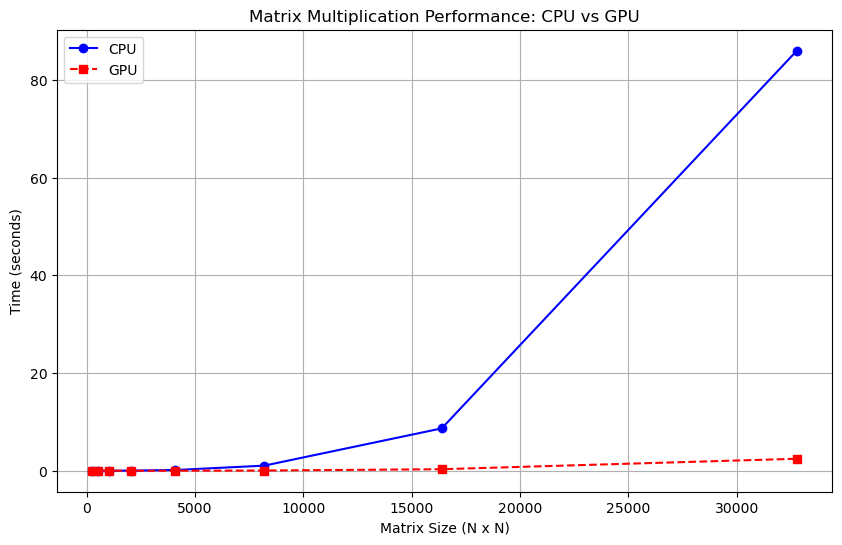

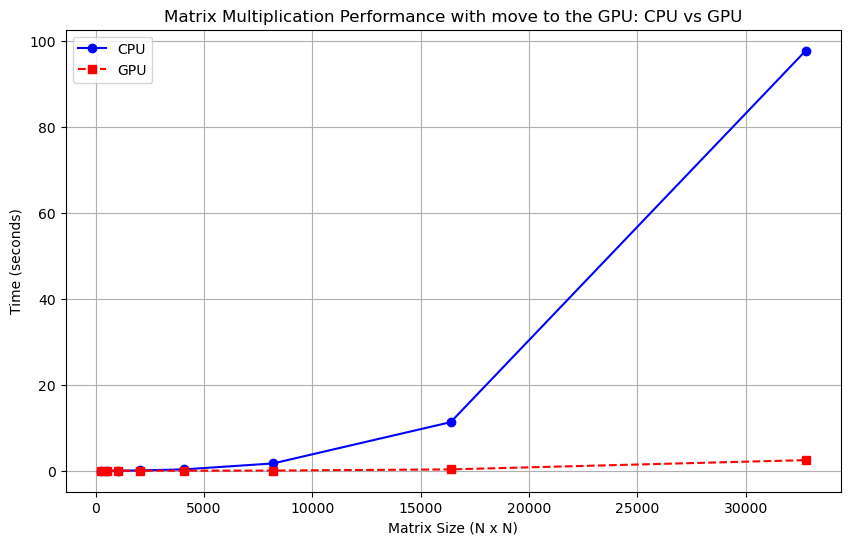

In [15]:
plt.figure(figsize=(10, 6))

# Plot CPU times
plt.plot(sizes, cpu_time, label='CPU', marker='o', linestyle='-', color='b')

# Plot GPU times
plt.plot(sizes, gpu_time, label='GPU', marker='s', linestyle='--', color='r')

plt.title('Matrix Multiplication Performance: CPU vs GPU')
plt.xlabel('Matrix Size (N x N)')
plt.ylabel('Time (seconds)')
plt.legend()
plt.grid(True)
# plt.xscale('log')
# plt.yscale('log')

plt.show()

plt.figure(figsize=(10, 6))

# Plot CPU times
plt.plot(sizes, cpu_time_move, label='CPU', marker='o', linestyle='-', color='b')

# Plot GPU times
plt.plot(sizes, gpu_time_move, label='GPU', marker='s', linestyle='--', color='r')

plt.title('Matrix Multiplication Performance with move to the GPU: CPU vs GPU')
plt.xlabel('Matrix Size (N x N)')
plt.ylabel('Time (seconds)')
plt.legend()
plt.grid(True)
# plt.xscale('log')
# plt.yscale('log')

plt.show()

It is clear that GPU computations outperform the CPU on large matrices, but mainly in most use cases we won't encounter such large matrices, To understand how valuable it is for real usage, consider looking into plot with matrix size < 8192.

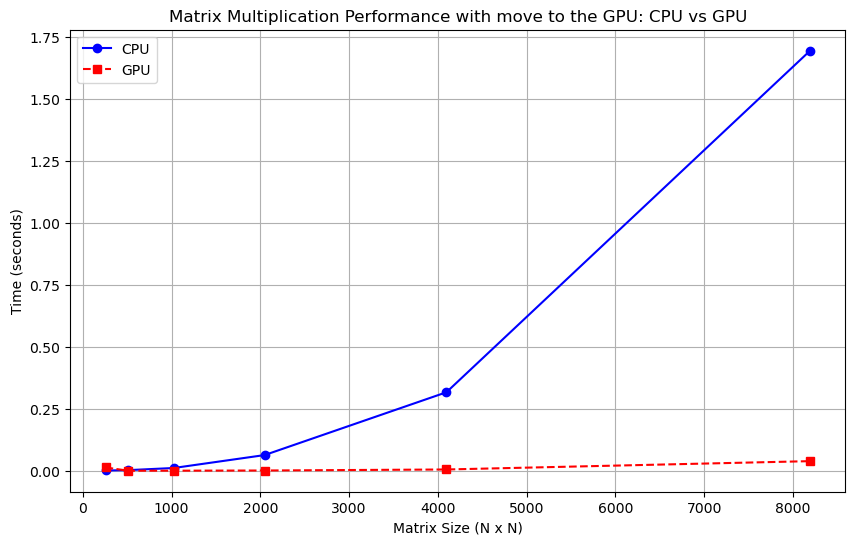

In [18]:
plt.figure(figsize=(10, 6))

# Plot CPU times
plt.plot(sizes[:6], cpu_time_move[:6], label='CPU', marker='o', linestyle='-', color='b')

# Plot GPU times
plt.plot(sizes[:6], gpu_time_move[:6], label='GPU', marker='s', linestyle='--', color='r')

plt.title('Matrix Multiplication Performance with move to the GPU: CPU vs GPU')
plt.xlabel('Matrix Size (N x N)')
plt.ylabel('Time (seconds)')
plt.legend()
plt.grid(True)
# plt.xscale('log')
# plt.yscale('log')

plt.show()

From this more zoomed plot, it is also evident that even with move time to the GPU it is always beneficial to use GPU computations, in this case using CuPy.